<a href="https://colab.research.google.com/github/kalinosia/TensorFlow/blob/main/klasyfikacja_kwiat%C3%B3w.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Klasyfikacja kwiatów


---


**Cel**

Celem tego zadania jest wytrenowanie klasyfikatora kwiatów, a także spawdzenie umiętności przekształcania i analizy danych.

**Opis zadania**

**Zbiór:** https://www.kaggle.com/alxmamaev/flowers-recognition

Preferowany framework: Tensorflow 2.0


---


1.    Stwórz wykres słupkowy (x – klasa, y – liczba zdjęć w klasie). Każdy słupek ma być podpisany odpowiednią liczbą.
2.    Podziel cały zbiór na zbiór treningowy (70% od całego) i testowy (30% od całego).
3.    Zaproponuj własną architekturę klasyfikatora i wytrenuj do najwyższej jakości.
4.    Stwórz wykres z przebiegiem treningu (loss, accuracy).
5.    Sprawdź jakość rozwiązania na zbiorze testowym (możesz wykorzystać classification_report i confusion_matrix).
6.    Wygeneruj nowe zdjęcia przy pomocy przekształcenia zdjęć oryginalnych, tak żeby liczba zdjęć per class w zbiorze treningowym była jednakowa dla wszystkich klas.
7.    Stwórz wykres słupkowy (x – klasa, y – liczba zdjęć w klasie). Każdy słupek ma być podpisany odpowiednią liczbą.
8.    Wytrenuj klasyfikator z taką samą architekturą na nowym zbiorze.
9.    Stwórz wykres z przebiegiem treningu (loss, accuracy).
10.    Sprawdź jakość rozwiązania na zbiorze testowym (możesz wykorzystać classification_report i confusion_matrix).
11.    Porównaj wyniki, wyciągnij wnioski.


---


**Wynik**

Proszę wysłać wynikowy notebook.

**Przydatne linki**

https://pytorch.org/vision/stable/transforms.html - możesz użyć tego do wygenerowania zdjęć na podstawie zdjęć oryginalnych

# Preliminary

## Imports

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
from tqdm import tqdm  # dir
import cv2 
import random # e.g to plot random images 

In [4]:
from keras.preprocessing.image import save_img #tf.keras.utils.save_img(image, path)????
import secrets  # generate name to image  #secrets.token_hex(25)

In [5]:
from sklearn.preprocessing import LabelEncoder  # labels in data in array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split  # data in array split

In [6]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [7]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam

## **Authenticating with Kaggle using kaggle.json**

Navigate to https://www.kaggle.com. Then go to the [Account tab of your user profile](https://www.kaggle.com/me/account) and select Create API Token. This will trigger the download of kaggle.json, a file containing your API credentials.

Then run the cell below to upload kaggle.json to your Colab runtime.

### Lokalne podłączanie Dysku Google

Z przykładu poniżej możesz się dowiedzieć, jak podłączyć Dysk Google w środowisku wykonawczym, korzystając z kodu autoryzacji, oraz jak zapisywać na nim pliki i je z niego odczytywać. Po uruchomieniu tego kodu zobaczysz na stronie <a href="https://drive.google.com/">https://drive.google.com/</a> nowy plik o nazwie „<code>foo.txt</code>”.

Te przykłady kodu obsługują tylko odczytywanie, zapisywanie i przenoszenie plików. Aby za pomocą własnego kodu zmieniać ustawienia udostępniania lub inne metadane, skorzystaj z jednej z pozostałych opcji podanych poniżej.

<strong>Uwaga:</strong> podczas korzystania z przycisku „Podłącz Dysk Google” w przeglądarce nie są potrzebne żadne kody uwierzytelniające w przypadku notatników, które były edytowane tylko przez bieżącego użytkownika.

In [9]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
!cp /content/drive/MyDrive/kaggle.json kaggle.json

In [ ]:
drive.flush_and_unmount()

In [ ]:
# Then move kaggle.json into the folder where the API expects to find it!!!!!!!!!!!!!
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

### Przesyłanie plików z lokalnego systemu plików

Użycie metody <code>files.upload</code> powoduje zwrócenie słownika przesłanych plików.
Kluczami w słowniku są nazwy plików, a wartościami – przesłane dane.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

### Other way - have your token - manualy add and save

In [10]:
'''
import json
token = {"username":"dominikakalinowska","key":"fd593bea1b00b7c77fc6776e5c03c8bd"}
with open('kaggle.json', 'w') as file:
    json.dump(token, file)
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
'''

'\nimport json\ntoken = {"username":"dominikakalinowska","key":"fd593bea1b00b7c77fc6776e5c03c8bd"}\nwith open(\'kaggle.json\', \'w\') as file:\n    json.dump(token, file)\n!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json\n'

In [11]:
import os
os.environ['KAGGLE_USERNAME'] = "dominikakalinowska"
os.environ['KAGGLE_KEY'] = "fd593bea1b00b7c77fc6776e5c03c8."


## KAGGLE DATASET

In [12]:
!kaggle datasets download -d alxmamaev/flowers-recognition

 94% 211M/225M [00:01<00:00, 169MB/s]
100% 225M/225M [00:01<00:00, 174MB/s]


In [13]:
!unzip flowers-recognition.zip

Archive:  flowers-recognition.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  i

## Exploring data

In [14]:
import pathlib
data_dir = pathlib.Path('flowers')
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

4317


In [15]:
roses = list(data_dir.glob('rose/*'))
print(len(roses))

784


In [16]:
dir='flowers/'
for folder in os.listdir(dir):
  print('Number for files in '+folder+'=',len(os.listdir(dir+folder)))

Number for files in rose= 784
Number for files in tulip= 984
Number for files in dandelion= 1052
Number for files in sunflower= 733
Number for files in daisy= 764


In [17]:
flowers_amount = []
for flower in os.listdir('flowers'):
  flowers_amount.append(len(os.listdir(os.path.join('flowers', flower))))
print(flowers_amount)

[784, 984, 1052, 733, 764]


In [18]:
 print("Classes names are: ", os.listdir('flowers'))

Classes names are:  ['rose', 'tulip', 'dandelion', 'sunflower', 'daisy']


In [19]:
flowers_classes=os.listdir('flowers')

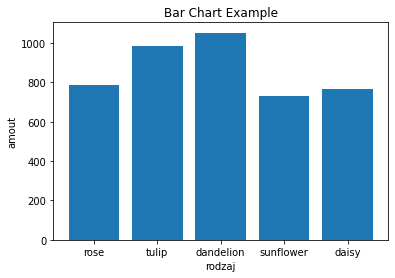

In [20]:
# Look at index 4 and 6, which demonstrate overlapping cases.

x = os.listdir('flowers')
y = flowers_amount

# Colors: https://matplotlib.org/api/colors_api.html

plt.bar(x, y)
plt.plot()
plt.ylabel("amout")
plt.xlabel("rodzaj")
plt.title("Bar Chart Example")
plt.show()

## Visualizing basic data

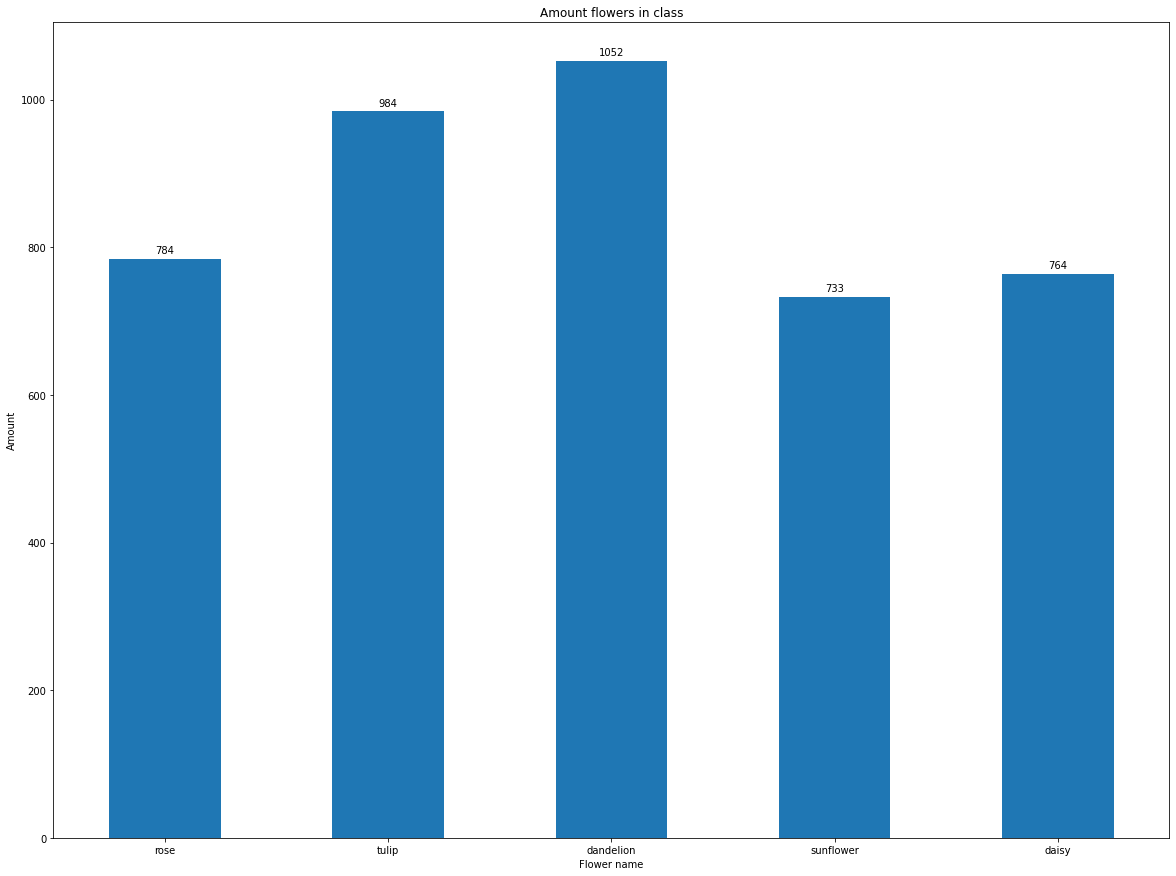

In [21]:
#https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart


freq_series = pd.Series(flowers_amount)  # pandas library
x_labels = os.listdir('flowers')

# Plot the figure.
plt.figure(figsize=(20, 15))
ax = freq_series.plot(kind="bar")
ax.set_title("Amount flowers in class")
ax.set_xlabel("Flower name")
ax.set_ylabel("Amount")
ax.set_xticklabels(x_labels, rotation=0)

rects = ax.patches

# Make some labels.
#labels = [f"label{i}" for i in range(len(rects))]
labels=flowers_amount

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()

# Array and labels

In [ ]:
imgs=[]
labels=[]

imgs2=[]
labels2=[]

IMG_SIZE=150


### Prepare data

In [ ]:
def flower_dir(flower):
  return os.path.join('flowers', flower)

def make_train_data(flower,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=flower
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # !
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        imgs.append(np.array(img))
        labels.append(str(label))


In [ ]:
# os.listdir('flowers') ->['dandelion', 'rose', 'sunflower', 'tulip', 'daisy']
for flower in os.listdir('flowers'):
  make_train_data(flower,flower_dir(flower))

100%|██████████| 1052/1052 [00:02<00:00, 448.94it/s]


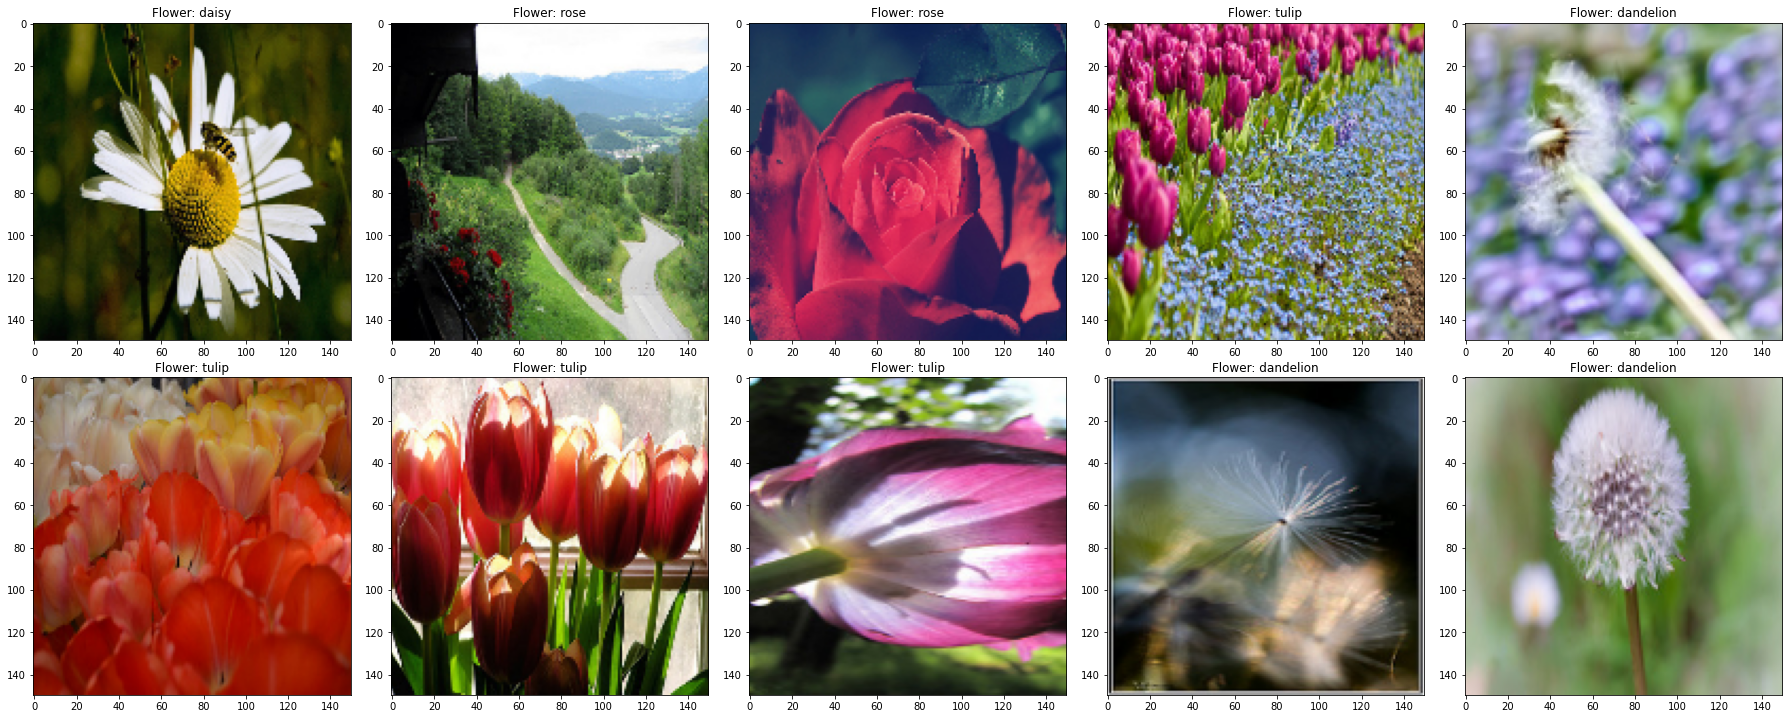

In [ ]:
row = 2
col = 5
fig,ax=plt.subplots(row,col)#,figsize=(col*5, row*5))
fig.set_size_inches((col*5,row*5))
for i in range(row):
    for j in range (col):
        l=random.randint(0,len(labels)-1)
        ax[i,j].imshow(imgs[l])#, 'gist_rainbow') # https://gallantlab.github.io/colormaps.html
        ax[i,j].set_title('Flower: '+labels[l])
        
plt.tight_layout()

####### CZY POWINNO SIĘ ODBYWAĆ CZYSZCZENIE Z DANYCH KTÓRE SĄ ZDŁE PO PROSTU...?

In [ ]:
#print(len(labels))

#print(len(imgs))

#print(labels[0])
#print(imgs[0])

#print(str(np.shape(imgs)))

5260
5260
rose
(5260, 150, 150, 3)


In [ ]:
#from sklearn.preprocessing import LabelEncoder
#from tensorflow.keras.utils import to_categorical

le=LabelEncoder()
Y=le.fit_transform(labels) #[a,b,c,d,..]->[1,2,3,4,...]
Y=to_categorical(Y,5)  # [[.0,.0,1,.0,.0]...]
imgs=np.array(imgs)
imgs=imgs/255

#### Split to train and test 

In [ ]:
imgs_train, imgs_test,labels_train,labels_test=train_test_split(imgs,Y,test_size=0.3,random_state=13)  # Y !! not labels

In [ ]:
np.random.seed(13)
random.seed(13)
tf.random.set_seed(13)

In [ ]:
#print(str(np.shape(imgs_test[0])))
#print(imgs_test[0].shape)
#print(len(imgs_test))
#print("Min and max pixel values:", imgs[0].min(), imgs[0].max())

(150, 150, 3)
(150, 150, 3)
1296
Min and max pixel values: 0.0 1.0


In [ ]:
#labels_test[0]

array([0., 0., 0., 0., 1.], dtype=float32)



---



### Model, fit, evaluate, prediction, analize




---



In [ ]:
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import Dropout, Flatten,Activation
#from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
# Some model to try...

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(len(flowers_classes), activation = "softmax"))


In [ ]:
batch_size=32
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [ ]:
'''

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(imgs_train)

'''

In [ ]:
#from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 96)       0

In [ ]:
'''
History = model.fit_generator(datagen.flow(imgs_train,labels_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (imgs_test,labels_test),
                              verbose = 1, 
                              steps_per_epoch=int(np.ceil(imgs_train.shape[0] // float(batch_size))),
                              #validation_steps=int(np.ceil(imgs_test.shape[0] / float(batch_size)))
                              )
'''

#### Train data

In [ ]:
History = model.fit(imgs_train,labels_train,
                              epochs = epochs,
                              #validation_data = (imgs_test,labels_test),
                              #verbose=2
                              )

Epoch 1/50
95/95 - 13s - loss: 1.2719 - accuracy: 0.4657 - 13s/epoch - 140ms/step
Epoch 2/50
95/95 - 2s - loss: 1.0078 - accuracy: 0.5948 - 2s/epoch - 24ms/step
Epoch 3/50
95/95 - 2s - loss: 0.8492 - accuracy: 0.6706 - 2s/epoch - 24ms/step
Epoch 4/50
95/95 - 2s - loss: 0.7657 - accuracy: 0.6978 - 2s/epoch - 24ms/step
Epoch 5/50
95/95 - 2s - loss: 0.6389 - accuracy: 0.7544 - 2s/epoch - 24ms/step
Epoch 6/50
95/95 - 2s - loss: 0.4832 - accuracy: 0.8126 - 2s/epoch - 24ms/step
Epoch 7/50
95/95 - 2s - loss: 0.3142 - accuracy: 0.8841 - 2s/epoch - 24ms/step
Epoch 8/50
95/95 - 2s - loss: 0.2185 - accuracy: 0.9262 - 2s/epoch - 24ms/step
Epoch 9/50
95/95 - 2s - loss: 0.1168 - accuracy: 0.9619 - 2s/epoch - 24ms/step
Epoch 10/50
95/95 - 2s - loss: 0.1171 - accuracy: 0.9623 - 2s/epoch - 24ms/step
Epoch 11/50
95/95 - 2s - loss: 0.1039 - accuracy: 0.9652 - 2s/epoch - 24ms/step
Epoch 12/50
95/95 - 2s - loss: 0.0925 - accuracy: 0.9735 - 2s/epoch - 24ms/step
Epoch 13/50
95/95 - 2s - loss: 0.0635 - accura

#### Visualizing learning

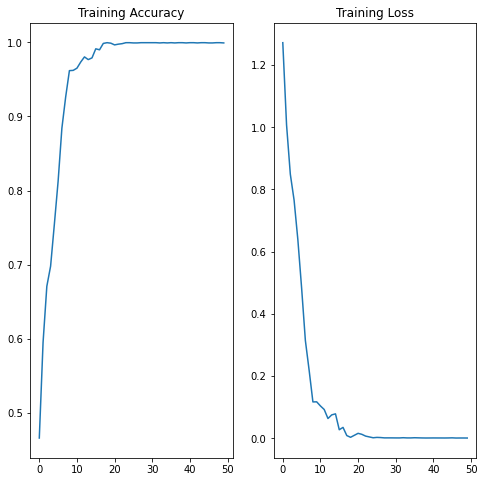

In [ ]:
acc = History.history['accuracy']

loss = History.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.title('Training Loss')
plt.savefig('./foo.png')
plt.show()

##### if have val data

In [ ]:
'''
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train loss', 'val loss'])
plt.show()
'''

"\nplt.plot(History.history['loss'])\nplt.plot(History.history['val_loss'])\nplt.title('Model Loss')\nplt.ylabel('Loss')\nplt.xlabel('Epochs')\nplt.legend(['train loss', 'val loss'])\nplt.show()\n"

In [ ]:
'''
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train accurancy', 'val accuracy'])
plt.show()
'''

"\nplt.plot(History.history['accuracy'])\nplt.plot(History.history['val_accuracy'])\nplt.title('Model Accuracy')\nplt.ylabel('Accuracy')\nplt.xlabel('Epochs')\nplt.legend(['train accurancy', 'val accuracy'])\nplt.show()\n"

In [ ]:
# getting predictions on val set.
results = model.evaluate(imgs_test, labels_test, batch_size=128)

print("test acc:", int(results[1]*100),"%")

pred=model.predict(imgs_test)
pred_digits=np.argmax(pred,axis=1)

11/11 [==============================] - 2s 47ms/step - loss: 3.0094 - accuracy: 0.6752
test acc: 67 %


In [ ]:
pred_digits

array([3, 2, 1, ..., 3, 1, 4])

#### sklearn.metrics.classification_report

In [ ]:
#from sklearn.metrics import classification_report

In [ ]:
# reverse LabelEncoder
true_labels=[]
for l in labels_test:
  index=np.where(l==np.amax(l))
  true_labels.append(index[0][0])

#print(true_labels)

[4, 4, 1, 4, 4, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 1, 4, 1, 2, 3, 2, 4, 2, 2, 4, 4, 1, 3, 0, 1, 4, 3, 4, 0, 2, 4, 3, 2, 4, 2, 3, 2, 4, 2, 0, 1, 4, 3, 4, 2, 2, 2, 2, 4, 1, 4, 2, 1, 2, 1, 1, 0, 4, 0, 2, 3, 1, 3, 3, 3, 2, 1, 4, 3, 1, 0, 2, 3, 3, 4, 2, 4, 2, 3, 4, 1, 2, 3, 0, 1, 4, 1, 4, 0, 1, 2, 4, 3, 4, 2, 3, 0, 0, 1, 2, 4, 2, 3, 1, 4, 4, 0, 2, 0, 1, 1, 1, 0, 3, 4, 2, 0, 0, 4, 0, 1, 1, 2, 3, 3, 4, 4, 3, 3, 4, 0, 4, 3, 3, 3, 3, 2, 2, 1, 3, 0, 4, 3, 1, 1, 4, 4, 1, 0, 0, 2, 1, 4, 4, 4, 4, 0, 2, 4, 1, 1, 4, 1, 4, 0, 1, 2, 2, 2, 3, 4, 3, 3, 0, 4, 1, 2, 0, 3, 1, 0, 2, 4, 2, 1, 4, 2, 0, 1, 2, 0, 4, 2, 2, 2, 4, 1, 2, 1, 1, 4, 1, 1, 4, 3, 4, 4, 1, 1, 0, 0, 3, 0, 1, 4, 0, 4, 4, 0, 3, 4, 2, 0, 1, 3, 1, 3, 1, 3, 1, 3, 2, 1, 0, 0, 4, 4, 2, 1, 4, 2, 1, 2, 1, 1, 4, 1, 1, 0, 1, 1, 4, 2, 4, 0, 4, 1, 4, 3, 2, 4, 3, 3, 0, 4, 2, 0, 0, 1, 3, 4, 0, 2, 4, 0, 0, 0, 2, 1, 3, 0, 3, 3, 0, 1, 0, 2, 1, 0, 3, 4, 3, 1, 1, 2, 1, 4, 2, 2, 0, 4, 4, 1, 4, 1, 4, 3, 1, 1, 0, 2, 3, 1, 3, 2, 4, 0, 0, 0, 4, 4, 4, 0, 4, 4, 0, 0, 1, 

In [ ]:
print(classification_report(true_labels, pred_digits, target_names=flowers_classes))

              precision    recall  f1-score   support

   sunflower       0.72      0.63      0.67       214
        rose       0.71      0.78      0.75       306
       tulip       0.66      0.52      0.58       266
       daisy       0.74      0.76      0.75       229
   dandelion       0.58      0.67      0.62       281

    accuracy                           0.68      1296
   macro avg       0.68      0.67      0.67      1296
weighted avg       0.68      0.68      0.67      1296



#### sklearn.metrics.confusion_matrix

In [ ]:
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
cm =confusion_matrix(true_labels,pred_digits)

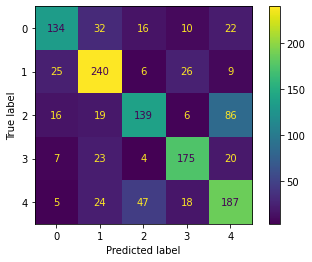

In [ ]:
cm_display=ConfusionMatrixDisplay(cm).plot()



---



### Deleta data... Clean 

In [ ]:
image_vis = imgs[0]  # to explore aug

In [ ]:
del imgs, labels, imgs_train, imgs_test, labels_train, labels_test
del History, results, pred

# and more...?

### Prepare data II

https://stackoverflow.com/questions/58427610/how-to-save-images-after-data-augmentation-in-a-new-folder-without-looping

https://github.com/aleju/imgaug/issues/258

#### Augmentation 

https://www.tensorflow.org/tutorials/images/data_augmentation#using_tfimage

Not this... i want to save img to folder???

scikit
...... 
https://colab.research.google.com/github/goodboychan/chans_jupyter/blob/main/_notebooks/2020-07-31-01-Introducing-Image-Processing-and-scikit-image.ipynb

##### Explore transformations

In [ ]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

In [ ]:
image= image_vis

flipped = tf.image.flip_left_right(image)
grayscaled = tf.image.rgb_to_grayscale(image)
bright = tf.image.adjust_brightness(image, 0.4)
cropped = tf.image.central_crop(image, central_fraction=0.5)
rotated = tf.image.rot90(image)

visualize(image, flipped)
visualize(image,  tf.squeeze(grayscaled))
_ = plt.colorbar()  # !!!
visualize(image, bright)
visualize(image, cropped)
visualize(image, rotated)


NameError: ignored

In [ ]:
seed = (3, 0)


rand_bri=tf.image.stateless_random_brightness(image, random.random(), seed)
rand_cont=tf.image.stateless_random_contrast(image, 0, random.random(), seed)
rand_crop=tf.image.stateless_random_crop(image, size=(random.randint(10, IMG_SIZE), random.randint(10, IMG_SIZE), 3), seed=seed)
rand_flip=tf.image.stateless_random_flip_left_right(image, seed)
rand_flip2=tf.image.stateless_random_flip_up_down(image, seed)
rand_hue=tf.image.stateless_random_hue(image, random.uniform(0, 0.5), seed)
rand_qual=tf.image.stateless_random_jpeg_quality(image, random.randint(0, 30), random.randint(30, 100), seed)
rand_sat=tf.image.stateless_random_saturation(image,random.randint(0, 30), random.randint(30, 100), seed)

visualize(image, rand_bri)
visualize(image, rand_cont)
visualize(image, rand_crop)
visualize(image, rand_flip)
visualize(image, rand_flip2)
visualize(image, rand_hue)
visualize(image, rand_qual)
visualize(image, rand_sat)


##### Generate random transformations

In [ ]:
seed = (3, 0)  ###############################################

def rand_brit(image):
  return tf.image.stateless_random_brightness(image, random.random(), seed)
def rand_cont(image):
  return tf.image.stateless_random_contrast(image, 0, random.random(), seed)
def rand_crop(image):
  return tf.image.stateless_random_crop(image, size=(random.randint(10, IMG_SIZE), random.randint(10, IMG_SIZE), 3), seed=seed)
def rand_flip_hor(image):
  return tf.image.stateless_random_flip_left_right(image, seed)
def rand_flip_ver(image):
  return tf.image.stateless_random_flip_up_down(image, seed)
def rand_hue(image):
  return tf.image.stateless_random_hue(image, random.uniform(0, 0.5), seed)
def rand_qual(image):
  return tf.image.stateless_random_jpeg_quality(image, random.randint(0, 30), random.randint(31, 100), seed)
def rand_sat(image):
  return tf.image.stateless_random_saturation(image,random.randint(0, 30), random.randint(31, 100), seed)


In [ ]:
# generate_image_with_random_transformation 
def gen_img_rand_trans(image):
  i = random.randint(1, 15)
  return {
    1: rand_brit(image),
    2: rand_cont(image),
    3: rand_crop(image),
    4: rand_flip_hor(image),
    5: rand_flip_ver(image),
    6: rand_hue(image),
    7: rand_qual(image),
    8: rand_sat(image),
    9: rand_brit(rand_cont(image)), # if more this is harder to learn..
    10: rand_flip_hor(rand_sat(rand_brit(image))),
    11: rand_crop(rand_hue(rand_cont(image))),
    12: rand_hue(rand_qual(rand_sat(rand_cont(rand_brit(rand_flip_hor(image)))))),
    13: rand_flip_ver(rand_flip_hor(rand_cont(rand_qual(image)))),
    14: rand_crop(rand_brit(rand_qual(image))),
    15: rand_qual(rand_brit(rand_cont(rand_hue(rand_sat(image)))))
    }[i]
  

In [ ]:
#visualize(image, gen_img_rand_trans(image))

##### Add more images to folders

In [ ]:
#IMG_SIZE=150
#labels2=[]
#imgs2=[]

In [ ]:
# remind data... only to check
print(flowers_classes)
print(flowers_amount)
max_flowers=max(flowers_amount)
print(max_flowers)

['sunflower', 'rose', 'tulip', 'daisy', 'dandelion']
[733, 784, 984, 764, 1052]
1052


In [ ]:
def saveImg(image, class_image):
  path=str('flowers/'+class_image+'/'+secrets.token_hex(25)+'.jpg')
  save_img(path, image)


In [ ]:
for flower in os.listdir('flowers'):
  temp_stor=[]
  for img in tqdm(os.listdir(os.path.join('flowers',flower))):
    path = os.path.join('flowers',flower,img)
    img = cv2.imread(path,cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # !
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    temp_stor.append(np.array(img))
    
  for i in range(max_flowers-len(temp_stor)):
    img = temp_stor[random.randint(0, len(temp_stor)-1)]
    img = gen_img_rand_trans(img)
    saveImg(img, flower)
      

100%|██████████| 1052/1052 [00:03<00:00, 336.59it/s]


#### Visualize data after more added

In [ ]:
flowers_amount = []
for flower in os.listdir('flowers'):
  flowers_amount.append(len(os.listdir(os.path.join('flowers', flower))))
print(flowers_amount)

[1052, 1052, 1052, 1052, 1052]


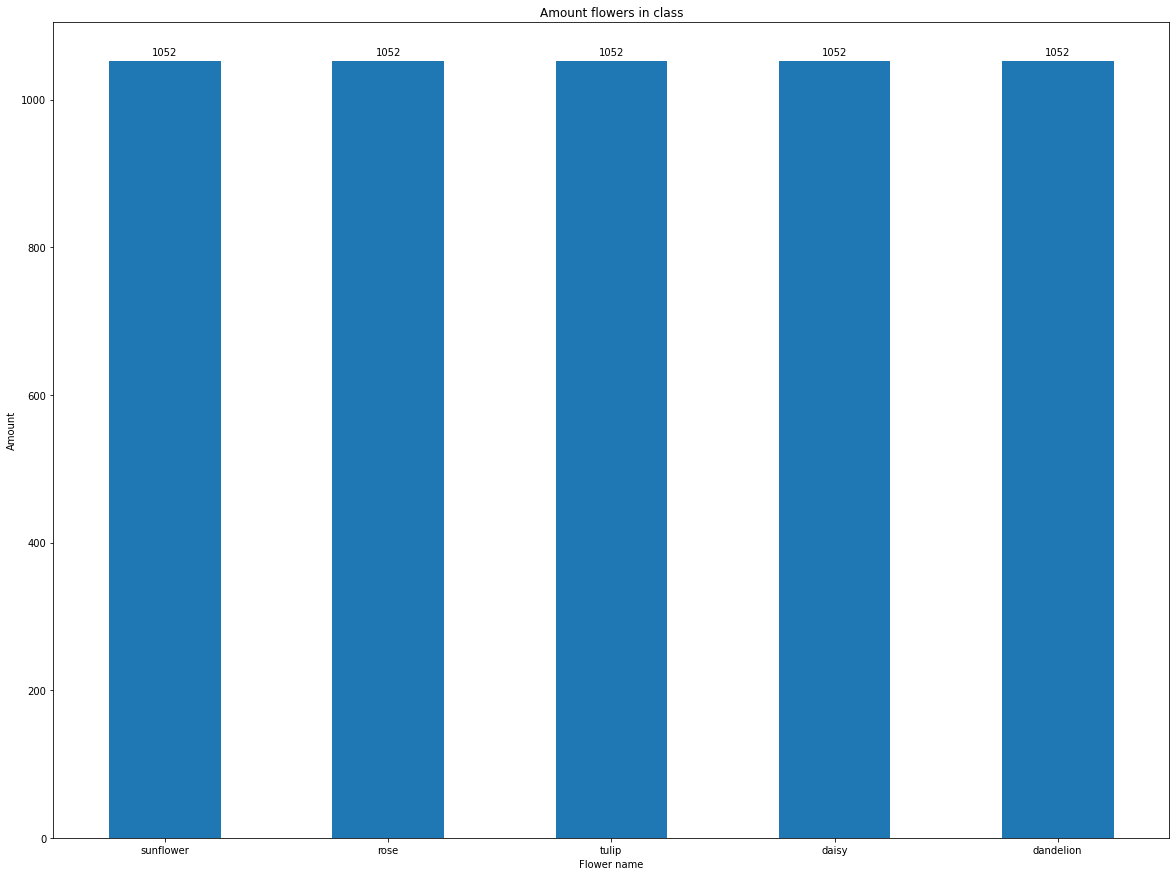

In [ ]:
freq_series = pd.Series(flowers_amount)  # pandas library
x_labels = os.listdir('flowers')

# Plot the figure.
plt.figure(figsize=(20, 15))
ax = freq_series.plot(kind="bar")
ax.set_title("Amount flowers in class")
ax.set_xlabel("Flower name")
ax.set_ylabel("Amount")
ax.set_xticklabels(x_labels, rotation=0)

rects = ax.patches

# Make some labels.
#labels = [f"label{i}" for i in range(len(rects))]
labels=flowers_amount

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()

In [ ]:
def visualize_image(image):
    plt.figure(figsize=(6, 6))
    plt.axis('off')
    plt.imshow(image)

#### Load data from folders

In [ ]:
def flower_dir(flower):
  return os.path.join('flowers', flower)

def make_train_data(flower,DIR):
    flowersToGen=[]
    for img in tqdm(os.listdir(DIR)):
        label=flower
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        imgs2.append(np.array(img))
        labels2.append(str(label))

In [ ]:
for flower in os.listdir('flowers'):
  make_train_data(flower,flower_dir(flower))

100%|██████████| 1052/1052 [00:03<00:00, 294.39it/s]


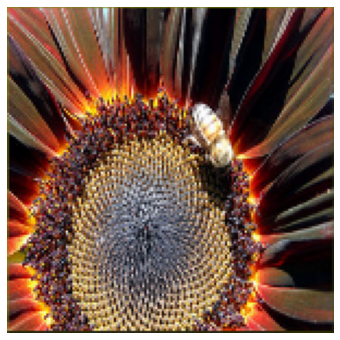

In [ ]:
visualize_image(imgs2[0])

In [ ]:
le=LabelEncoder()
Y2=le.fit_transform(labels2)
Y2=to_categorical(Y2, len(flowers_classes))  # y !!
imgs2=np.array(imgs2)
imgs2=imgs2/255

#### Split to train and test

In [ ]:
#print(len(imgs2), len(labels2))

5260 5260


In [ ]:
imgs2_train, imgs2_test,labels2_train,labels2_test=train_test_split(imgs2,Y2,test_size=0.3,random_state=13)  # Y !! not labels

In [ ]:
np.random.seed(13)
random.seed(13)
tf.random.set_seed(13)

## Model, fit, evaluate, prediction, analize




---



In [ ]:
'''
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(len(flowers_classes), activation = "softmax"))
'''

In [ ]:
'''
batch_size=32
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)
'''

In [ ]:
'''

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(imgs_train)

'''

In [ ]:
'''
from tensorflow.keras.optimizers import Adam


model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

'''

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 96)       0

In [ ]:
'''
History = model.fit_generator(datagen.flow(imgs_train,labels_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (imgs_test,labels_test),
                              verbose = 1, 
                              steps_per_epoch=int(np.ceil(imgs_train.shape[0] // float(batch_size))),
                              #validation_steps=int(np.ceil(imgs_test.shape[0] / float(batch_size)))
                              )
'''

### Train 

In [ ]:
History = model.fit(imgs2_train,labels2_train,
                              epochs = epochs
                              )

Epoch 1/50
116/116 [==============================] - 3s 29ms/step - loss: 1.1155 - accuracy: 0.5970
Epoch 2/50
116/116 [==============================] - 3s 26ms/step - loss: 0.6028 - accuracy: 0.7890
Epoch 3/50
116/116 [==============================] - 3s 26ms/step - loss: 0.3359 - accuracy: 0.8851
Epoch 4/50
116/116 [==============================] - 3s 26ms/step - loss: 0.1750 - accuracy: 0.9408
Epoch 5/50
116/116 [==============================] - 3s 26ms/step - loss: 0.1525 - accuracy: 0.9449
Epoch 6/50
116/116 [==============================] - 3s 26ms/step - loss: 0.0973 - accuracy: 0.9641
Epoch 7/50
116/116 [==============================] - 3s 26ms/step - loss: 0.0946 - accuracy: 0.9680
Epoch 8/50
116/116 [==============================] - 3s 26ms/step - loss: 0.0708 - accuracy: 0.9742
Epoch 9/50
116/116 [==============================] - 3s 27ms/step - loss: 0.0564 - accuracy: 0.9783
Epoch 10/50
116/116 [==============================] - 3s 26ms/step - loss: 0.0503 - accura

#### Visializing

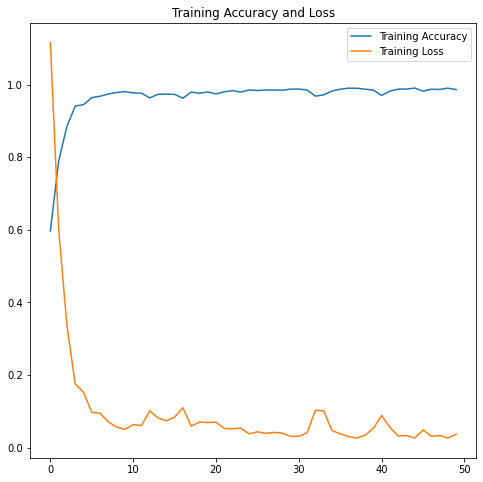

In [ ]:
acc = History.history['accuracy']

loss = History.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Accuracy and Loss')
plt.savefig('./foo.png')
plt.show()

### Evaluate

In [ ]:
# getting predictions on val set.
results = model.evaluate(imgs2_test, labels2_test, batch_size=128)

print("test acc:", int(results[1]*100),"%")

13/13 [==============================] - 1s 66ms/step - loss: 2.6281 - accuracy: 0.6831
test acc: 68 %


### Predict

In [ ]:
pred=model.predict(imgs2_test)
pred_digits=np.argmax(pred,axis=1)

#### sklearn.metrics.classification_report

In [ ]:
# reverse LabelEncoder
true_labels2=[]
for l in labels2_test:
  index=np.where(l==np.amax(l))
  true_labels2.append(index[0][0])

[1, 1, 0, 1, 0, 3, 3, 3, 2, 4, 1, 4, 1, 2, 2, 3, 3, 2, 2, 3, 1, 3, 0, 1, 4, 0, 3, 3, 0, 4, 2, 2, 2, 4, 2, 0, 4, 1, 1, 3, 4, 0, 3, 3, 0, 1, 4, 2, 3, 4, 4, 0, 4, 3, 4, 1, 1, 4, 1, 2, 4, 2, 4, 1, 2, 1, 0, 1, 1, 4, 3, 1, 2, 1, 1, 0, 2, 0, 2, 0, 0, 3, 0, 1, 4, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 0, 4, 0, 3, 4, 3, 4, 0, 2, 4, 4, 3, 2, 0, 3, 4, 0, 2, 1, 4, 0, 0, 0, 0, 2, 0, 3, 0, 1, 2, 4, 0, 0, 4, 0, 4, 4, 1, 2, 1, 2, 1, 0, 0, 3, 0, 3, 1, 2, 3, 2, 3, 4, 4, 4, 0, 4, 3, 4, 2, 1, 1, 3, 4, 2, 3, 4, 3, 1, 0, 2, 0, 1, 1, 3, 4, 2, 4, 1, 1, 0, 1, 4, 2, 1, 0, 1, 4, 4, 3, 3, 4, 3, 3, 0, 0, 4, 2, 2, 2, 2, 2, 0, 1, 3, 0, 4, 0, 1, 4, 1, 2, 3, 3, 2, 2, 3, 2, 4, 2, 3, 4, 1, 4, 3, 4, 4, 4, 0, 0, 1, 3, 2, 1, 4, 0, 0, 4, 3, 3, 1, 2, 0, 2, 2, 3, 1, 4, 0, 1, 4, 1, 3, 0, 4, 1, 2, 0, 3, 3, 3, 3, 1, 4, 0, 4, 4, 0, 0, 4, 0, 0, 3, 1, 1, 4, 1, 2, 3, 3, 4, 2, 4, 1, 4, 4, 3, 1, 3, 3, 2, 0, 1, 3, 3, 1, 4, 3, 1, 2, 2, 2, 2, 0, 4, 2, 1, 2, 3, 1, 3, 4, 0, 1, 2, 2, 4, 2, 0, 4, 1, 2, 2, 4, 3, 1, 2, 3, 1, 4, 0, 3, 3, 0, 3, 4, 4, 

In [ ]:
print(classification_report(true_labels2, pred_digits, target_names=flowers_classes))

              precision    recall  f1-score   support

   sunflower       0.71      0.69      0.70       302
        rose       0.74      0.73      0.73       329
       tulip       0.63      0.62      0.63       320
       daisy       0.74      0.68      0.71       320
   dandelion       0.61      0.69      0.65       307

    accuracy                           0.68      1578
   macro avg       0.69      0.68      0.68      1578
weighted avg       0.69      0.68      0.68      1578



In [ ]:
'''
https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py
from time import time

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.svm import SVC

t0 = time()

n_components = 150

pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(imgs2_test)


X_train_pca = pca.transform(imgs2_test)



clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)
clf = clf.fit(X_train_pca, y_train)



print(classification_report(true_labels2, pred_digits, target_names=flowers_classes))
ConfusionMatrixDisplay.from_estimator(
    clf, X_test_pca, true_labels2, display_labels=flowers_classes, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()''' # NOT DONE ! SOME ERRORS

#### sklearn.metrics.confusion_matrix

In [ ]:
cm2 =confusion_matrix(true_labels2,pred_digits)

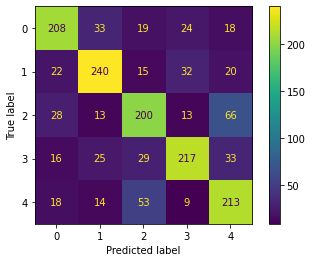

In [ ]:
cm2_display=ConfusionMatrixDisplay(cm2).plot()

## AND MORE :

https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#sphx-glr-auto-examples-miscellaneous-plot-display-object-visualization-py



---



---



---



---



##### model try

---



In [ ]:
num_classes = len(flowers_classes)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])


In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [ ]:
print(len(imgs2_train), len(labels2_train))

In [ ]:
model.fit(imgs2_train, labels2_train, verbose=2)


In [ ]:
test_loss, test_acc = model.evaluate(imgs2_test,  labels2_test, verbose=2)

print('\nTest accuracy:', test_acc)


##### Model sklearn try not done..

In [ ]:
imgs2_train.shape

In [ ]:
type(imgs2_train)

In [ ]:
Xtrain=imgs2_train.flatten()
print(Xtrain.shape)

In [ ]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
Xtrain=imgs2_train.flatten()
model.fit(Xtrain, labels2_train)           # 3. fit model to data
y_model = model.predict(imgs2_test)        # 4. predict on new data

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

# Split folders  # CHECK BEFORE USE -> choose val or not..
```
flowers/                      dataset/
  daisy/           \             train/
  dandelion/     ---\               daisy/
  rose/          ---/               dandelion/
  sunflower/       /                ....
  tulip/                         validation/
                                     daisy/
                                     ....
                                  test/
                                     daisy/
                                     ....

```

### Split folders do

In [25]:
pip install split-folders

In [26]:
import splitfolders 

In [27]:
splitfolders.ratio(data_dir, output="dataset", seed=1337, ratio=(.7,.0,.3), group_prefix=None) #ratio=(.7,.0,.3)

Copying files: 4317 files [00:01, 2939.85 files/s]


In [28]:
train_dir = os.path.join('dataset', 'train')
val_dir = os.path.join('dataset', 'val')
test_dir = os.path.join('dataset', 'test')

In [29]:
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(val_dir)])
total_test = sum([len(files) for r, d, files in os.walk(test_dir)])

print("Number of train images: ", total_train,
      "\nNumber of validation images: ", total_val,
      "\nNumber of test images(other): ", total_test)

Number of train images:  3019 
Number of validation images:  0 
Number of test images(other):  1298


### tf.data.Dataset vs. keras.preprocessing.image.DirectoryIterator

In [ ]:
batch_size = 32
img_height = 150
img_width = 150



>    **tf.keras.preprocessing.image_dataset_from_directory**
    Generates a tf.data.Dataset from image files in a directory.

>    **ImageDataGenerator.flow_from_directory**
    Takes the path to a directory & generates batches of augmented data.

While their return type also differs but the key difference is that *flow_from_directory* is a method of ImageDataGenerator while *image_dataset_from_directory* is a preprocessing function to read image form directory.

*image_dataset_from_directory* will not facilitate you with augmented image generation capability on-the-fly. 



---


Which? 

It's quite common to generate augmented images when working with CNN, so better to use flow_from_directory. If you do not need augmented image, you may control the same by the parameters of ImageDataGenerator



---


https://keras.io/api/preprocessing/image/#imagedatagenerator-class

https://towardsdatascience.com/what-is-the-best-input-pipeline-to-train-image-classification-models-with-tf-keras-eb3fe26d3cc5

https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720 -generator

https://sayak.dev/tf.keras/data_augmentation/image/2020/05/10/augmemtation-recipes.html


https://keras.io/api/preprocessing/image/#imagedatagenerator-class


### 1) tf.data.Dataset -> tf.keras.utils.image_dataset_from_directory

https://www.tensorflow.org/tutorials/images/classification


Let's load these images off disk using the helpful `tf.keras.utils.image_dataset_from_directory` utility.

#### Prepare data

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3019 files belonging to 5 classes.


If validation folder is empty can use: `train_ds`  can split to validation_ds...
Or if only one folder can that split where val => test

```
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
```
```
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
```

In [ ]:
# Here will be error if validation folder is empty...  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
val_ds = tf.keras.utils.image_dataset_from_directory(
  val_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1298 files belonging to 5 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

You can call `.numpy()` on either of these tensors to convert them to a `numpy.ndarray`.

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


**Configure the dataset for performance**

Let's make sure to use buffered prefetching so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data:

- `Dataset.cache` keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.
- `Dataset.prefetch` overlaps data preprocessing and model execution while training.

Interested readers can learn more about both methods, as well as how to cache data to disk in the *Prefetching* section of the [Better performance with the tf.data API](../../guide/data_performance.ipynb) guide.

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)  #???

#### Model

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(len(class_names))
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

#### Train

In [ ]:
history = model.fit(
  train_ds,
  #validation_data=val_ds,
  epochs=10
)

Epoch 1/10
95/95 [==============================] - 115s 1s/step - loss: 1.3693 - accuracy: 0.3753
Epoch 2/10
95/95 [==============================] - 107s 1s/step - loss: 1.0805 - accuracy: 0.5658
Epoch 3/10
95/95 [==============================] - 107s 1s/step - loss: 0.9156 - accuracy: 0.6416
Epoch 4/10
95/95 [==============================] - 108s 1s/step - loss: 0.7752 - accuracy: 0.7032
Epoch 5/10
95/95 [==============================] - 107s 1s/step - loss: 0.6251 - accuracy: 0.7555
Epoch 6/10
95/95 [==============================] - 107s 1s/step - loss: 0.5060 - accuracy: 0.8188
Epoch 7/10
95/95 [==============================] - 107s 1s/step - loss: 0.3734 - accuracy: 0.8711
Epoch 8/10
95/95 [==============================] - 107s 1s/step - loss: 0.3619 - accuracy: 0.8745
Epoch 9/10
95/95 [==============================] - 107s 1s/step - loss: 0.2637 - accuracy: 0.9076
Epoch 10/10
95/95 [==============================] - 108s 1s/step - loss: 0.1465 - accuracy: 0.9540


#### Visualizing result 

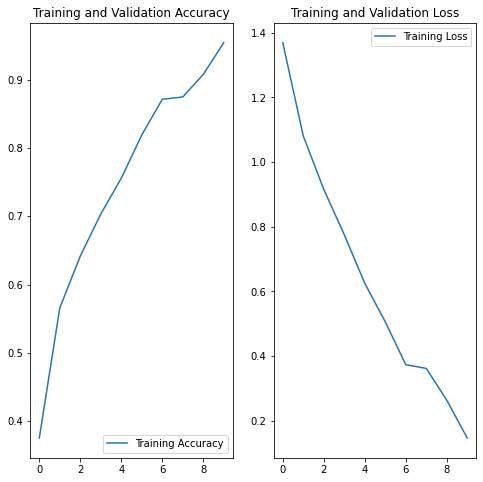

In [ ]:
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']

loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


#### model.evaluate

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print("%s%s: %.2f%%" % ("Test ",model.metrics_names[1], test_acc*100))
print("%s%s: %.2f%%" % ("Test ",model.metrics_names[0], test_loss*100))

41/41 [==============================] - 16s 346ms/step - loss: 1.7187 - accuracy: 0.6063
Test accuracy: 60.63%
Test loss: 171.87%


#### model.predict

In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


#### Add more images to folders

In [ ]:
IMG_SIZE=150

In [ ]:
# remind data... only to check
print(flowers_classes)
print(flowers_amount)
max_flowers=max(flowers_amount)
print(max_flowers)

In [ ]:
def saveImg(image, class_image):
  path=str('flowers/'+class_image+'/'+secrets.token_hex(25)+'.jpg')
  save_img(path, image)


In [ ]:
for flower in os.listdir('flowers'):
  temp_stor=[]
  for img in tqdm(os.listdir(os.path.join('flowers',flower))):
    path = os.path.join('flowers',flower,img)
    img = cv2.imread(path,cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # !
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    temp_stor.append(np.array(img))
    
  for i in range(max_flowers-len(temp_stor)):
    img = temp_stor[random.randint(0, len(temp_stor)-1)]
    img = gen_img_rand_trans(img)
    saveImg(img, flower)
      

#### Not end - do like before

Now you can do the same way as at the beginning. 

- Preparing data
- Model can be the same so only fit
- evaluate
- predict
- and other

### 2) keras.preprocessing.image.DirectoryIterator 

> Path to the directory to read images from. Each subdirectory in this directory will be considered to contain images from one class, or alternatively you could specify class subdirectories via the classes argument. 

####Prepare data

In [22]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels

In [36]:
train_image_generator      = ImageDataGenerator(rescale=1./255)  # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation data
test_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our test data

In [30]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                           class_mode='sparse')

Found 3019 images belonging to 5 classes.


In [31]:
# be careful bc error if empty folder

val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='sparse')

NameError: ignored

In [37]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=test_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='sparse')

Found 1298 images belonging to 5 classes.


In [38]:
sample_training_images, _ = next(train_data_gen) 

In [39]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

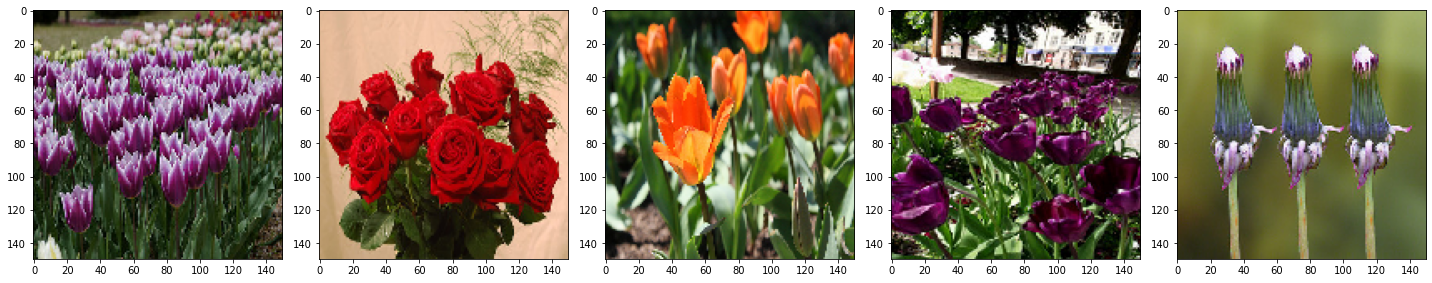

In [40]:
plotImages(sample_training_images[:5])  # Plot images 0-4

#### Model

In [41]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(flowers_classes)) 
])

In [43]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

#### Train

##### If validation folder not empty

In [ ]:
EPOCHS = 10
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

##### If not validation data

In [46]:
EPOCHS = 10
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS
    )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
31/31 [==============================] - 21s 334ms/step - loss: 1.3574 - accuracy: 0.3839
Epoch 2/10
31/31 [==============================] - 10s 331ms/step - loss: 1.1081 - accuracy: 0.5416
Epoch 3/10
31/31 [==============================] - 10s 331ms/step - loss: 1.0013 - accuracy: 0.5985
Epoch 4/10
31/31 [==============================] - 10s 341ms/step - loss: 0.9022 - accuracy: 0.6466
Epoch 5/10
31/31 [==============================] - 10s 332ms/step - loss: 0.8464 - accuracy: 0.6761
Epoch 6/10
31/31 [==============================] - 10s 330ms/step - loss: 0.7454 - accuracy: 0.7204
Epoch 7/10
31/31 [==============================] - 10s 330ms/step - loss: 0.7017 - accuracy: 0.7340
Epoch 8/10
31/31 [==============================] - 10s 331ms/step - loss: 0.6242 - accuracy: 0.7635
Epoch 9/10
31/31 [==============================] - 10s 327ms/step - loss: 0.5493 - accuracy: 0.7807
Epoch 10/10
31/31 [==============================] - 11s 334ms/step - loss: 0.4308 - accura

##### Visuzlize

##### If validation data 


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

##### If not validation data

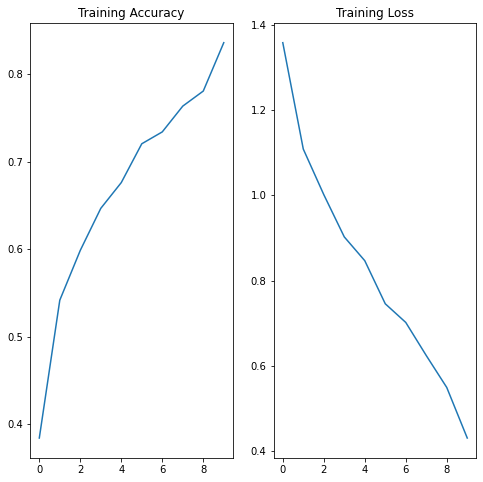

In [49]:
acc = history.history['accuracy']

loss = history.history['loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.title('Training Loss')
plt.savefig('./foo.png')
plt.show()

#### model.evaluate

In [67]:
test_loss, test_acc = model.evaluate(test_data_gen)
print("%s%s: %.2f%%" % ("Test ",model.metrics_names[1], test_acc*100))
print("%s%s: %.2f%%" % ("Test ",model.metrics_names[0], test_loss*100))

13/13 [==============================] - 4s 314ms/step - loss: 1.0576 - accuracy: 0.6733
Test accuracy: 67.33%
Test loss: 105.76%


#### Predictions 

In [54]:
predictions = model.predict(test_data_gen)

In [55]:
# A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value:
np.argmax(predictions[0])

4

In [58]:
predicted_class_indices = np.argmax(predictions, axis=1)
print('predictions: ', predicted_class_indices)

predictions:  [4 1 0 ... 3 3 2]


In [59]:

pred_labels = list(np.argmax(predictions, axis=-1))
print(pred_labels)

[4, 1, 0, 1, 4, 1, 0, 1, 0, 0, 1, 2, 4, 4, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 3, 0, 0, 0, 4, 1, 1, 4, 3, 0, 0, 1, 0, 3, 0, 1, 2, 1, 1, 0, 0, 0, 0, 2, 0, 4, 1, 0, 1, 1, 0, 2, 3, 0, 0, 0, 2, 3, 0, 1, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 4, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 1, 0, 4, 0, 0, 2, 1, 0, 1, 0, 1, 2, 0, 0, 2, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 

In [61]:
# getting true labels
true_labels = test_data_gen.classes
print(true_labels)

[0 0 0 ... 4 4 4]


In [63]:
import sklearn

In [64]:
cm = sklearn.metrics.confusion_matrix(true_labels, pred_labels)

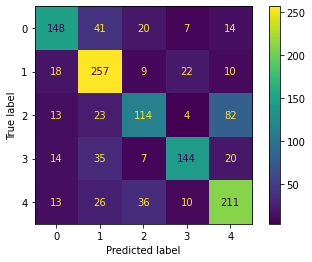

In [65]:
cm_display=ConfusionMatrixDisplay(cm).plot()

and so on

#### Add more images to folders

In [ ]:
IMG_SIZE=150

In [ ]:
# remind data... only to check
print(flowers_classes)
print(flowers_amount)
max_flowers=max(flowers_amount)
print(max_flowers)

In [ ]:
def saveImg(image, class_image):
  path=str('flowers/'+class_image+'/'+secrets.token_hex(25)+'.jpg')
  save_img(path, image)


In [ ]:
for flower in os.listdir('flowers'):
  temp_stor=[]
  for img in tqdm(os.listdir(os.path.join('flowers',flower))):
    path = os.path.join('flowers',flower,img)
    img = cv2.imread(path,cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # !
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    temp_stor.append(np.array(img))
    
  for i in range(max_flowers-len(temp_stor)):
    img = temp_stor[random.randint(0, len(temp_stor)-1)]
    img = gen_img_rand_trans(img)
    saveImg(img, flower)
      

Do like before....
prepare data, fit, evalate,....

And so on

# WITHOUT SPLIT FOLDERS tf.keras.utils.image_dataset_from_directory

#### Prepare data

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=123,
  validation_split=0.2,
  subset="training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3019 files belonging to 5 classes.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(  # Can be validation or test but must be names "validation"...
  data_dir,
  seed=123,
  validation_split=0.2,
  subset="validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1298 files belonging to 5 classes.


# LINKI i UWAGI

ładowanie obrazów flow czy from dir
...


https://sites.google.com/view/amarnath-r/keras-deep-learning-image-classification-a-simple-example



wykresy

https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/